# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

## 1. Is the distribution of body temperatures normal?

In [1]:
%pylab inline

import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


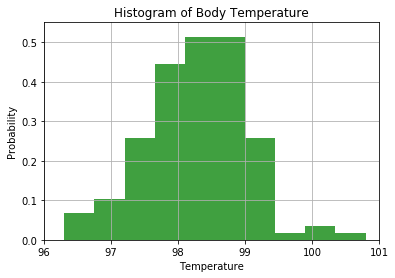

In [52]:
n, bins, patches = plt.hist(df['temperature'], 10, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.title('Histogram of Body Temperature')
plt.axis([96, 101, 0, 0.55])
plt.grid(True)
plt.show()

In [3]:
z,pval = stats.normaltest(df.temperature)

if(pval < 0.055):
    print("Not normal distribution")

#### As the pval > 0.055, it is very likely that the distribution of body temperatures is a normal distribution

## 2. Is the sample size large? Are the observations independent?

In [4]:
print(df.shape[0])

130


#### Since the sample size is > 30, it can be considered as large sample

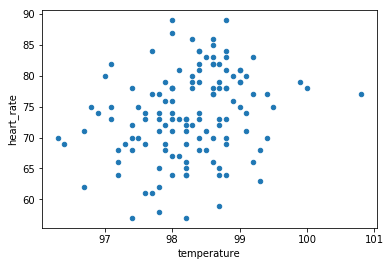

In [5]:
df.plot(kind='scatter',x='temperature',y='heart_rate')
plt.show()

In [6]:
print(df.corr())

             temperature  heart_rate
temperature     1.000000    0.253656
heart_rate      0.253656    1.000000


##### <font color=red> How to conclude if the observations are independent?</font>

#### Since the correlation coefficient between temperature and heart rate is very less we can assume the data is independant.

## 3. Is the true population mean really 98.6 degrees F?

In [7]:
print("The mean temperature of the sample is: ", round(df.temperature.mean(),2))
print("The standard deviation temperature of the sample is: ", round(df.temperature.std(),2))

one_sample = stats.ttest_1samp(df.temperature, 98.6)
print("The t-statistic is ", one_sample[0], " and the p-value is ", one_sample[1])

The mean temperature of the sample is:  98.25
The standard deviation temperature of the sample is:  0.73
The t-statistic is  -5.45482329236  and the p-value is  2.41063204156e-07


In [8]:
sigma = df.temperature.std()/math.sqrt(130)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 129,                     # Degrees of freedom
                 loc = df.temperature.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(98.122002905608042, 98.376458632853513)

In [9]:
stats.t.interval(0.999,                        # Confidence level
                 df = 129,                     # Degrees of freedom
                 loc = df.temperature.mean(), # Sample mean
                 scale= sigma)  

(98.032682658320113, 98.465778880141457)

The test result shows the test statistic "t" is equal to -5.45. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. 
The 95% confidence limits extend from 98.12 to 98.38. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 98.6. Even the 99.9% confidence interval of 98.03 to 98.46 excludes the value 98.6. 
Hence with 99.9% confidence we can conclude that the population mean not really 98.6 degrees F.

#### 3.1 Would you use a one-sample or two-sample test? Why?

A one sample t-test is used to compare the mean of a sample to a known value whereas a two sample t test is used to compare the means of two different samples.
In this case we are testing whether the population's mean temperature for the sample is not significantly different from 98.6. Hence we are using one-sample t test. 

#### 3.2 In this situation, is it appropriate to use the  t or z statistic?

T-test is best applied, at least in theory, if you have a limited sample size (n < 30) as long as the variables are approximately normally distributed and the variation of scores in the two groups is not reliably different. It is also great if you do not know the populations’ standard deviation. 
Since we do not know the populations’ standard deviation and the sample distribution is not an ideal normal distribution, t statistic is appropriate for the hypothesis testing

#### 3.3 Now try using the other test. How is the result be different? Why?

In [10]:
from statsmodels.stats.weightstats import ztest

In [19]:
zstat, pval = ztest(df['temperature'], x2=None, value=98.6, alternative='two-sided', 
                    usevar='pooled', ddof=1.0)

print("The z-statistic is ", zstat, " and the p-value  is ", pval)

The z-statistic is  -5.45482329236  and the p-value  is  4.9021570141e-08


## 4. At what temperature should we consider someone's temperature to be "abnormal"?

We have seen that with 99.9% confidence interval the mean body temperature is expected to fall between 98.03 and 98.46. Hence if someone's temerature is above 98.46 we should consider that as abnormal.

## 5. Is there a significant difference between males and females in normal temperature?

In [26]:
dfmale = df[df['gender'] == 'M']['temperature']

In [31]:
dffemale = df[df['gender'] == 'F']['temperature']

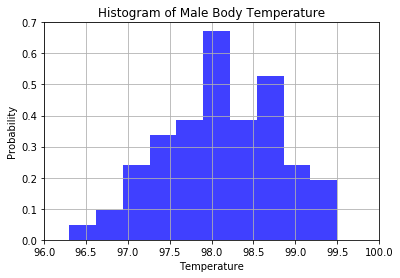

In [57]:
n, bins, patches = plt.hist(dfmale, 10, normed=1, facecolor='b', alpha=0.75)

plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.title('Histogram of Male Body Temperature')
plt.axis([96, 100, 0, 0.7])
plt.grid(True)
plt.show()

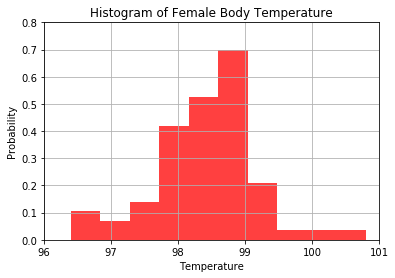

In [61]:
n, bins, patches = plt.hist(dffemale, 10, normed=1, facecolor='r', alpha=0.75)

plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.title('Histogram of Female Body Temperature')
plt.axis([96, 101, 0, 0.8])
plt.grid(True)
plt.show()

In [30]:
print("The mean temperature of all male is: ", round(dfmale.mean(),2))
print("The standard deviation temperature of all male is: ", round(dfmale.std(),2))

print("The mean temperature of all female is: ", round(dffemale.mean(),2))
print("The standard deviation temperature of all female is: ", round(dffemale.std(),2))

two_sample = stats.ttest_ind(a= dfmale, b= dffemale, equal_var=False) 
print("The t-statistic is ", two_sample[0], " and the p-value is ", two_sample[1])

The mean temperature of all male is:  98.1
The standard deviation temperature of all male is:  0.7
The mean temperature of all female is:  98.39
The standard deviation temperature of all female is:  0.74
The t-statistic is  -2.28543453817  and the p-value is  0.0239382641829


Here the null hypothesis is that 
The test yields a p-value of 0.02394, which means there is a 2% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would reject the null hypothesis, since the p-value is less than the corresponding significance level of 5%.

Since we are comparing the mean body temperature of male and female we can use the two  sample t-test as it is used to compare the means of two different samples.